In [1]:
!pip list

Package                      Version
---------------------------- ---------------------
absl-py                      1.4.0
accelerate                   0.23.0
aiofiles                     23.1.0
aiohttp                      3.8.4
aiosignal                    1.3.1
alembic                      1.12.1
altair                       4.2.2
anyio                        3.6.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
array-record                 0.4.1
asttokens                    2.0.8
astunparse                   1.6.3
async-timeout                4.0.2
attrs                        22.1.0
Babel                        2.10.3
backcall                     0.2.0
bayesian-optimization        1.4.1
beautifulsoup4               4.11.1
bleach                       5.0.1
blinker                      1.6.2
cachetools                   5.3.0
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.1.1
ChatterBot              


[notice] A new release of pip is available: 23.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install streamlit==1.26.00

     ---------------------------------------- 8.1/8.1 MB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 8.0 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 10.0.1
    Uninstalling Pillow-10.0.1:
      Successfully uninstalled Pillow-10.0.1



[notice] A new release of pip is available: 23.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf 
import cv2 
import os
import imghdr
import matplotlib.pyplot as plt
import numpy as np

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [5]:
data_dir = 'C:\Workspace(All Kag and Other Data as well)\Classifier'

In [98]:
image_extensions = ['jpg', 'jpeg', 'png', 'bmp']
image_extensions

['jpg', 'jpeg', 'png', 'bmp']

In [7]:
os.listdir(data_dir)

['Batman', 'Spider-Man']

In [8]:
for image_f in os.listdir(data_dir):
    print(image_f)
    

Batman
Spider-Man


In [9]:
for image_f in os.listdir(data_dir):
    for image in  os.listdir(os.path.join(data_dir, image_f)):
        image_path = os.path.join(data_dir, image_f, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_extensions:
                print('Image not in extensions list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path)) 

In [10]:
img = cv2.imread(os.path.join(data_dir, 'Batman' , '5vPndSdDicde7EwTyAtqjk.jpg' ))
img.shape

(1080, 1920, 3)

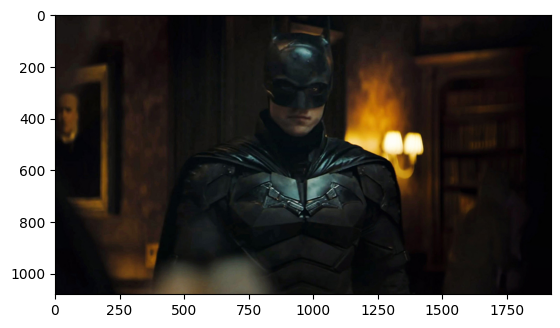

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [16]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [12]:
Data = tf.keras.utils.image_dataset_from_directory('Classifier', batch_size = 18)

Found 180 files belonging to 2 classes.


using the standarad params for the pipeline

In [13]:
img_iter = Data.as_numpy_iterator()
img_iter

In [14]:
batch = img_iter.next()

In [15]:
batch[0].shape

(18, 256, 256, 3)

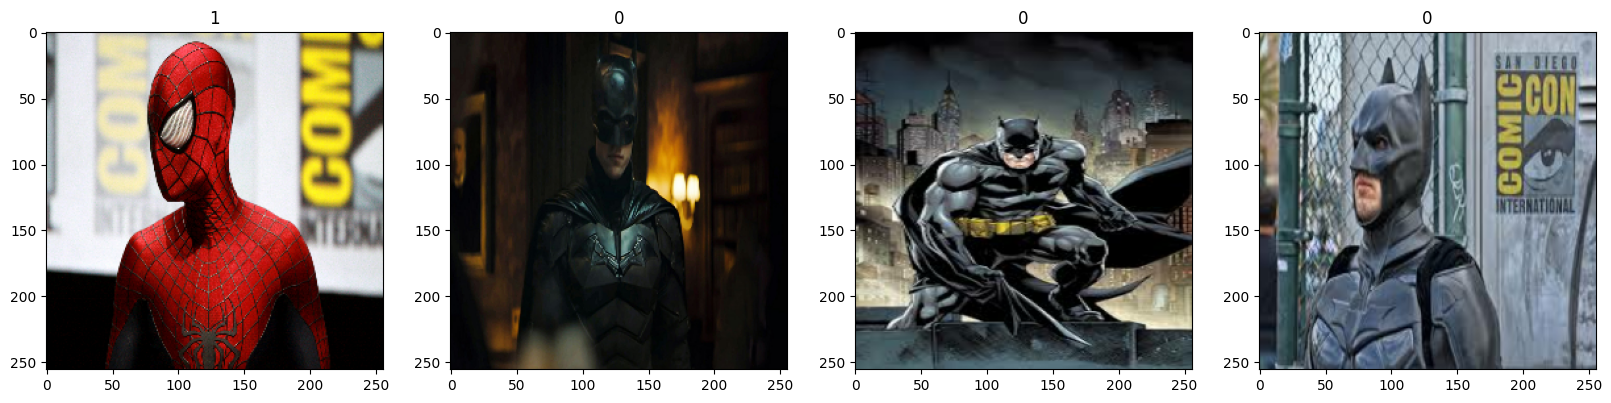

In [16]:
fig, ax = plt.subplots(ncols =4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

0- Batman , 1- Spider-Man

In [17]:
Data = Data.map(lambda x,y: (x/255, y))
scaled_img_iter = Data.as_numpy_iterator()

In [18]:
batch = scaled_img_iter.next()
batch[0].max()

1.0

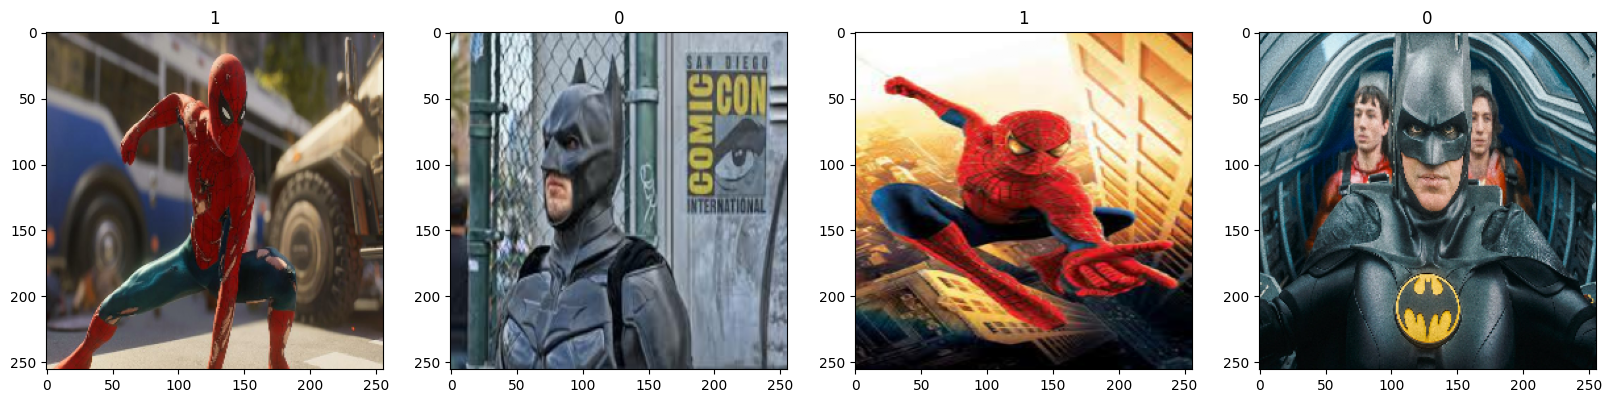

In [19]:
fig, ax = plt.subplots(ncols =4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [20]:
len(Data)

10

In [21]:
train_size = int(len(Data)*(7/10))
val_size = int(len(Data)*(2/10))
test_size = int(len(Data)*(1/10))

In [22]:
print("train size batches are: ",train_size)
print("test size batches are: ",test_size)
print("validation set batches are: ",val_size)

train size batches are:  7
test size batches are:  1
validation set batches are:  2


In [23]:
train_data = Data.take(train_size)
Val_data = Data.take(val_size)
test_data = Data.take(test_size)


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,  MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape =(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation= 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [33]:
logdir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [34]:
Results = model.fit(train_data, epochs =20, validation_data=Val_data, callbacks=[tensorboard_callback])

Epoch 1/20




7/7 [==============================] - 12s 872ms/step - loss: 0.7664 - accuracy: 0.4603 - val_loss: 0.6652 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 7s 724ms/step - loss: 0.6241 - accuracy: 0.7381 - val_loss: 0.5420 - val_accuracy: 0.8611
Epoch 3/20
7/7 [==============================] - 7s 699ms/step - loss: 0.4461 - accuracy: 0.8175 - val_loss: 0.4543 - val_accuracy: 0.6944
Epoch 4/20
7/7 [==============================] - 7s 732ms/step - loss: 0.5065 - accuracy: 0.7381 - val_loss: 0.4512 - val_accuracy: 0.6944
Epoch 5/20
7/7 [==============================] - 7s 761ms/step - loss: 0.3992 - accuracy: 0.8016 - val_loss: 0.3467 - val_accuracy: 0.9444
Epoch 6/20
7/7 [==============================] - 7s 683ms/step - loss: 0.2748 - accuracy: 0.9365 - val_loss: 0.1636 - val_accuracy: 0.9722
Epoch 7/20
7/7 [==============================] - 7s 747ms/step - loss: 0.1593 - accuracy: 0.9286 - val_loss: 0.1033 - val_accuracy: 0.9722
Epoch 8/20
7/7 [============

In [35]:
Results.history

{'loss': [0.7664191722869873,
  0.6241437196731567,
  0.4461471140384674,
  0.506466269493103,
  0.3991929888725281,
  0.2748463451862335,
  0.15930944681167603,
  0.06988751143217087,
  0.03766236826777458,
  0.034118153154850006,
  0.01763729937374592,
  0.005234939977526665,
  0.00406295619904995,
  0.0037366217002272606,
  0.0009996965527534485,
  0.0009545907378196716,
  0.0008154481765814126,
  0.0007006066152825952,
  0.0005481029511429369,
  0.000334177166223526],
 'accuracy': [0.460317462682724,
  0.738095223903656,
  0.817460298538208,
  0.738095223903656,
  0.8015872836112976,
  0.9365079402923584,
  0.9285714030265808,
  0.9841269850730896,
  0.9920634627342224,
  0.9920634627342224,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.665203332901001,
  0.5420215129852295,
  0.4542989134788513,
  0.4511537551879883,
  0.3467232882976532,
  0.16362613439559937,
  0.10325498878955841,
  0.03711862117052078,
  0.044857289642095566,
  0.016458

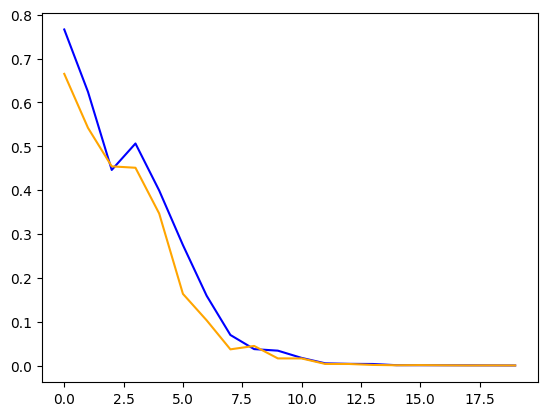

In [37]:
figure = plt.figure()
plt.plot(Results.history['loss'], color ='blue', label = 'loss')
plt.plot(Results.history['val_loss'], color ='orange', label = 'Validation loss')
plt.show()

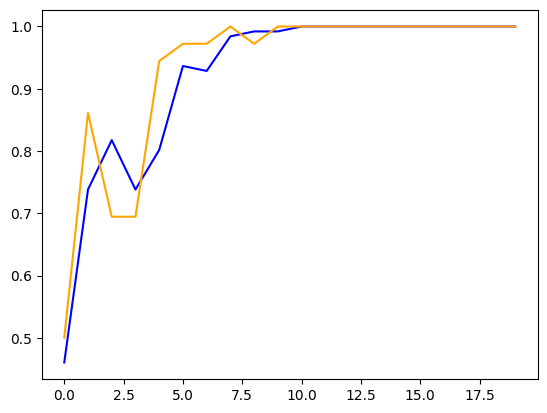

In [38]:
figure = plt.figure()
plt.plot(Results.history['accuracy'], color ='blue', label = 'loss')
plt.plot(Results.history['val_accuracy'], color ='orange', label = 'Validation loss')
plt.show()

In [39]:
from  tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pr = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test_data.as_numpy_iterator():
    x, y = batch
    pred = model.predict(x)
    pr.update_state(y, pred)
    re.update_state(y, pred)
    acc.update_state(y, pred)

print(f'Precision: {pr.result().numpy()},Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()}')

1/1 [==============================] - 0s 289ms/step
Precision: 1.0,Recall: 1.0,Accuracy: 1.0


TypeError: Image data of dtype object cannot be converted to float

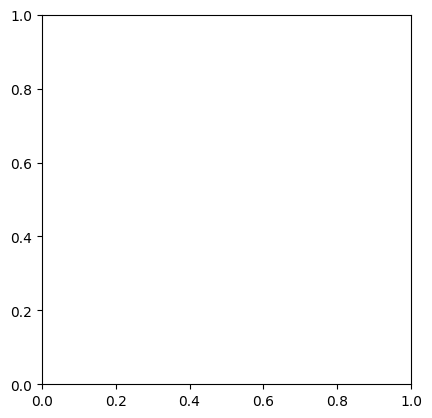

In [101]:
image = cv2.imread('Spidey_test/0edcfb844ff971dc3509f72eadd01c08.jpg')
plt.imshow(image)